<a href="https://colab.research.google.com/github/Michalinh0/DS2022/blob/main/graph_genetic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Set up

In [31]:
!pip install pygad
import pygad
!git clone https://github.com/Michalinh0/genetic_algorithm_graph.git
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
fatal: destination path 'genetic_algorithm_graph' already exists and is not an empty directory.


## Set up a graph

In [81]:
#with open('genetic_algorithm_graph/graph.txt') as file:
#    lines = file.readlines()
with open('genetic_algorithm_graph/graph2.txt') as file:
    lines = file.readlines()
#with open('genetic_algorithm_graph/graph3.txt') as file:
#    lines = file.readlines()
lines = [line.strip() for line in lines]
print(lines)

['7', '1 2 1 3 2 4 2 5 3 6 3 7']


In [82]:
vertices_count = int(lines[0])
print(vertices_count)
print(lines)
lines[1] = lines[1].split(" ")
edges = list()
edges_count = int(len(lines[1]) / 2)
for i in range(edges_count):
  edges.append((lines[1][2*i] , lines[1][2*i + 1]))
print(edges)

7
['7', '1 2 1 3 2 4 2 5 3 6 3 7']
[('1', '2'), ('1', '3'), ('2', '4'), ('2', '5'), ('3', '6'), ('3', '7')]


# Fitness function

In [85]:
def cross(edge1 , edge2 , vertices):
  x1 = vertices[int(edge1[0]) - 1]
  y1 = vertices[int(edge1[1]) - 1]
  x2 = vertices[int(edge2[0]) - 1]
  y2 = vertices[int(edge2[1]) - 1]
  print(x1 , y1 , x2 , y2)

In [88]:
def fitness(solution, solution_idx):
  vertices = list()
  for i in range(vertices_count):
    vertices.append((solution[2*i] , solution[2*i+1]))
  print(vertices)
  fitness = 2 * edges_count * (edges_count - 1)
  for edge in edges:
    for edge2 in edges:
      print(edge, edge2)
      if edge == edge2:
        continue
      if edge[0] == edge2[0] or edge[0] == edge2[1] or edge[1] == edge2[0] or edge[1] == edge2[1]:
        continue
      if cross(edge , edge2 , vertices):
          fitness -= 1
  return fitness
      

In [89]:
fitness([1,1,2,2,3,3,4,4,5,5,6,6,7,7] , 1)

[(1, 1), (2, 2), (3, 3), (4, 4), (5, 5), (6, 6), (7, 7)]
('1', '2') ('1', '2')
('1', '2') ('1', '3')
('1', '2') ('2', '4')
('1', '2') ('2', '5')
('1', '2') ('3', '6')
(1, 1) (2, 2) (3, 3) (6, 6)
('1', '2') ('3', '7')
(1, 1) (2, 2) (3, 3) (7, 7)
('1', '3') ('1', '2')
('1', '3') ('1', '3')
('1', '3') ('2', '4')
(1, 1) (3, 3) (2, 2) (4, 4)
('1', '3') ('2', '5')
(1, 1) (3, 3) (2, 2) (5, 5)
('1', '3') ('3', '6')
('1', '3') ('3', '7')
('2', '4') ('1', '2')
('2', '4') ('1', '3')
(2, 2) (4, 4) (1, 1) (3, 3)
('2', '4') ('2', '4')
('2', '4') ('2', '5')
('2', '4') ('3', '6')
(2, 2) (4, 4) (3, 3) (6, 6)
('2', '4') ('3', '7')
(2, 2) (4, 4) (3, 3) (7, 7)
('2', '5') ('1', '2')
('2', '5') ('1', '3')
(2, 2) (5, 5) (1, 1) (3, 3)
('2', '5') ('2', '4')
('2', '5') ('2', '5')
('2', '5') ('3', '6')
(2, 2) (5, 5) (3, 3) (6, 6)
('2', '5') ('3', '7')
(2, 2) (5, 5) (3, 3) (7, 7)
('3', '6') ('1', '2')
(3, 3) (6, 6) (1, 1) (2, 2)
('3', '6') ('1', '3')
('3', '6') ('2', '4')
(3, 3) (6, 6) (2, 2) (4, 4)
('3', '6') ('

60

# Genetic algorithm using Pygad

In [76]:
fitness_function = fitness

num_generations = 150
num_parents_mating = 32

sol_per_pop = 32
num_genes = 2*vertices_count

parent_selection_type = "sss"
keep_parents = 1

crossover_type = "single_point"

mutation_type = "random"
mutation_num_genes = 1

In [77]:
ga_instance = pygad.GA(num_generations=num_generations,
                       num_parents_mating=num_parents_mating,
                       fitness_func=fitness_function,
                       sol_per_pop=sol_per_pop,
                       num_genes=num_genes,
                       parent_selection_type=parent_selection_type,
                       keep_parents=keep_parents,
                       crossover_type=crossover_type,
                       mutation_type=mutation_type,
                       mutation_num_genes=mutation_num_genes)

ga_instance.run()

[-0.36813847  3.35616843 -1.22368277 -1.01244562 -1.24761939 -0.36130956
  2.41144038  4.71024018  5.35549105  3.35981647 -5.52430981 -1.03948208
  2.39523672  1.59710775] 60
[-0.3681384662608582, -1.2236827654225284, -1.2476193941293021, 2.4114403813795997, 5.355491052898797, -5.524309807652701, 2.395236716420925] [3.3561684339477056, -1.0124456193381366, -0.36130955794385855, 4.710240182819218, 3.3598164729091486, -1.0394820839541647, 1.597107745375173]
-------
-0.3681384662608582 -1.2236827654225284 3.3561684339477056 -1.0124456193381366
-----
-0.3681384662608582 -1.2476193941293021 3.3561684339477056 -0.36130955794385855
-----
-1.2236827654225284 2.4114403813795997 -1.0124456193381366 4.710240182819218
-----
-1.2236827654225284 5.355491052898797 -1.0124456193381366 3.3598164729091486
-----
-1.2476193941293021 -5.524309807652701 -0.36130955794385855 -1.0394820839541647
-----
-1.2476193941293021 2.395236716420925 -0.36130955794385855 1.597107745375173
-----


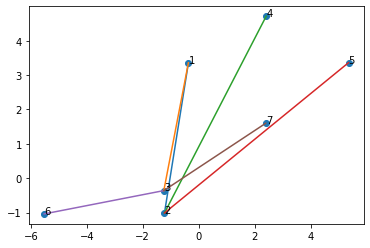

In [78]:
solution, solution_fitness, solution_idx = ga_instance.best_solution()
x = list()
y = list()
for i in range(vertices_count):
  x.append(solution[2*i])
  y.append(solution[2*i + 1])
print(solution , solution_fitness)
print(x,y)
plt.scatter(x,y)
print("-------")
for i, label in enumerate(x):
    plt.annotate(f"{i+1}", (x[i], y[i]))
for edge in edges:
  x1 = x[int(edge[0])-1]
  x2 = x[int(edge[1])-1]
  y1 = y[int(edge[0])-1]
  y2 = y[int(edge[1])-1]
  print(x1 , x2 , y1 , y2)
  print("-----")
  plt.plot((x1,x2) , (y1,y2))